In [23]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [24]:
#Data
print(os.getcwd())

data_link = os.getcwd() + "\\TBI\\TBI_data_2.csv"
print(data_link)

F:\CTSN_TBI\Machine_learning
F:\CTSN_TBI\Machine_learning\TBI\TBI_data_2.csv


In [25]:
df_tbi = pd.read_csv(data_link, delimiter = ",")
df_tbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   record_id                                     260 non-null    int64  
 1   age_at_record                                 259 non-null    float64
 2   sex                                           259 non-null    float64
 3   tbi_cli_reason                                259 non-null    float64
 4   tbi_cli_time_acci_hos                         240 non-null    float64
 5   tbi_cli_pulse                                 84 non-null     float64
 6   tbi_cli_temp                                  84 non-null     float64
 7   tbi_cli_blood_pressure                        83 non-null     float64
 8   tbi_cli_breathing_rate                        30 non-null     float64
 9   tbi_cli_glasgow                               260 non-null    int

In [26]:
selected_columns = ["tbi_cli_glasgow","tbi_ct_skull_risk", "ethanol", "tbi_ct_subdural_hematoma_position_proprotion", "tbi_ct_subdural_hematoma_position_value",
"tbi_ct_rotterdam", "tbi_ct_epidural_hematoma_value","tbi_ct_cerebral_contusion_volume",
"age_at_record","tbi_cli_blood_pressure","tbi_ct_epidural_hematoma_volume", "tbi_cli_pulse","tbi_cli_recall","tbi_cli_dam_chest_abdomen", "tbi_cli_temp",
"tbi_cli_breathing_rate","alt_v2","d_2_protein","tbi_cli_time_acci_hos","tbi_ct_brain_parenchyma___5"] 
# Select the columns
df_final = df_tbi[selected_columns]
df_final.head()


,tbi_cli_glasgow,tbi_ct_skull_risk,ethanol,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_blood_pressure,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_cli_recall,tbi_cli_dam_chest_abdomen,tbi_cli_temp,tbi_cli_breathing_rate,alt_v2,d_2_protein,tbi_cli_time_acci_hos,tbi_ct_brain_parenchyma___5
0,13,2.0,237.9,1.0,70.0,2.0,NaN,NaN,52.0,2.0,NaN,70.0,1.0,2.0,36.5,19.0,1.0,0.0,2.0,1
1,13,2.0,0.0,1.0,35.0,NaN,NaN,NaN,75.0,2.0,NaN,77.0,3.0,2.0,36.8,22.0,0.0,0.0,NaN,0
2,15,2.0,NaN,NaN,NaN,2.0,NaN,2.0,37.0,2.0,NaN,67.0,1.0,2.0,36.6,18.0,0.0,0.0,NaN,1
3,14,2.0,NaN,2.0,60.0,2.0,NaN,NaN,66.0,2.0,NaN,75.0,1.0,2.0,36.5,19.0,0.0,1.0,NaN,1
4,15,2.0,0.0,NaN,NaN,1.0,NaN,NaN,20.0,2.0,NaN,85.0,NaN,NaN,36.8,18.0,0.0,0.0,4.0,0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df_final
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.018599,0.663325,1.855910,-0.625543,0.543214,0.227946,NaN,NaN,0.402031,-0.370117,NaN,-0.792786,-1.322414,-0.396318,-0.795610,0.328322,1.802776,-0.411581,-0.194118,1.015505
1,-0.018599,0.663325,-0.725666,-0.625543,-3.308037,NaN,NaN,NaN,1.489632,-0.370117,NaN,-0.134370,1.012913,-0.396318,0.442006,2.066500,-0.554700,-0.411581,NaN,-0.984732
2,0.672219,0.663325,NaN,NaN,NaN,0.227946,NaN,-0.505425,-0.307274,-0.370117,NaN,-1.074964,-1.322414,-0.396318,-0.383072,-0.251070,-0.554700,-0.411581,NaN,1.015505
3,0.326810,0.663325,NaN,1.598611,-0.557143,0.227946,NaN,NaN,1.064049,-0.370117,NaN,-0.322489,-1.322414,-0.396318,-0.795610,0.328322,-0.554700,2.429655,NaN,1.015505
4,0.672219,0.663325,-0.725666,NaN,NaN,-1.020803,NaN,NaN,-1.111153,-0.370117,NaN,0.618104,NaN,NaN,0.442006,-0.251070,-0.554700,-0.411581,-0.182502,-0.984732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,0.663325,NaN,NaN,NaN,-1.020803,NaN,NaN,-1.016579,NaN,NaN,NaN,-1.322414,1.288034,NaN,NaN,-0.554700,NaN,-0.194118,-0.984732
256,-1.745643,-1.507557,1.059191,NaN,NaN,0.227946,NaN,NaN,-0.165413,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,-0.554700,NaN,-0.194118,1.015505
257,-0.018599,0.663325,NaN,-0.625543,-1.657501,-1.020803,NaN,NaN,1.915215,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,-0.554700,NaN,8.157150,-0.984732
258,0.326810,0.663325,NaN,1.598611,0.543214,0.227946,NaN,NaN,0.023735,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,1.802776,NaN,-0.176695,1.015505


In [28]:
df_tbi_f.columns = df_final.columns.to_list()
df_tbi_f

,tbi_cli_glasgow,tbi_ct_skull_risk,ethanol,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_subdural_hematoma_position_value,tbi_ct_rotterdam,tbi_ct_epidural_hematoma_value,tbi_ct_cerebral_contusion_volume,age_at_record,tbi_cli_blood_pressure,tbi_ct_epidural_hematoma_volume,tbi_cli_pulse,tbi_cli_recall,tbi_cli_dam_chest_abdomen,tbi_cli_temp,tbi_cli_breathing_rate,alt_v2,d_2_protein,tbi_cli_time_acci_hos,tbi_ct_brain_parenchyma___5
0,-0.018599,0.663325,1.855910,-0.625543,0.543214,0.227946,NaN,NaN,0.402031,-0.370117,NaN,-0.792786,-1.322414,-0.396318,-0.795610,0.328322,1.802776,-0.411581,-0.194118,1.015505
1,-0.018599,0.663325,-0.725666,-0.625543,-3.308037,NaN,NaN,NaN,1.489632,-0.370117,NaN,-0.134370,1.012913,-0.396318,0.442006,2.066500,-0.554700,-0.411581,NaN,-0.984732
2,0.672219,0.663325,NaN,NaN,NaN,0.227946,NaN,-0.505425,-0.307274,-0.370117,NaN,-1.074964,-1.322414,-0.396318,-0.383072,-0.251070,-0.554700,-0.411581,NaN,1.015505
3,0.326810,0.663325,NaN,1.598611,-0.557143,0.227946,NaN,NaN,1.064049,-0.370117,NaN,-0.322489,-1.322414,-0.396318,-0.795610,0.328322,-0.554700,2.429655,NaN,1.015505
4,0.672219,0.663325,-0.725666,NaN,NaN,-1.020803,NaN,NaN,-1.111153,-0.370117,NaN,0.618104,NaN,NaN,0.442006,-0.251070,-0.554700,-0.411581,-0.182502,-0.984732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,0.663325,NaN,NaN,NaN,-1.020803,NaN,NaN,-1.016579,NaN,NaN,NaN,-1.322414,1.288034,NaN,NaN,-0.554700,NaN,-0.194118,-0.984732
256,-1.745643,-1.507557,1.059191,NaN,NaN,0.227946,NaN,NaN,-0.165413,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,-0.554700,NaN,-0.194118,1.015505
257,-0.018599,0.663325,NaN,-0.625543,-1.657501,-1.020803,NaN,NaN,1.915215,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,-0.554700,NaN,8.157150,-0.984732
258,0.326810,0.663325,NaN,1.598611,0.543214,0.227946,NaN,NaN,0.023735,NaN,NaN,NaN,1.012913,1.288034,NaN,NaN,1.802776,NaN,-0.176695,1.015505


In [29]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi_i = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    float64
 1   tbi_ct_skull_risk                             260 non-null    float64
 2   ethanol                                       260 non-null    float64
 3   tbi_ct_subdural_hematoma_position_proprotion  260 non-null    float64
 4   tbi_ct_subdural_hematoma_position_value       260 non-null    float64
 5   tbi_ct_rotterdam                              260 non-null    float64
 6   tbi_ct_epidural_hematoma_value                260 non-null    float64
 7   tbi_ct_cerebral_contusion_volume              260 non-null    float64
 8   age_at_record                                 260 non-null    float64
 9   tbi_cli_blood_pressure                        260 non-null    flo

In [30]:
X= df_tbi_i
y = df_new_tbi_target
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 260 entries, 0 to 259
Series name: d_kl_tl
Non-Null Count  Dtype
--------------  -----
260 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [31]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


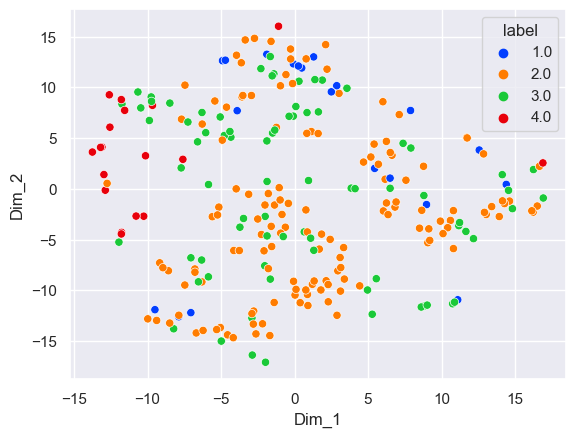

<Figure size 640x480 with 0 Axes>

In [34]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity=30, random_state = 0)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()
plt.savefig("TSNE before.png")


## Model training

In [18]:
# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(n_estimators=100))

# Create a list of models
models = [logreg_model,svm_model,  dt_model, knn_model, gnb,rf]

In [20]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [21]:
# print(X.value_counts())

#### LOOCV

In [22]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.6423076923076924, F1 Score: 0.6251909887281917
Mean Sensitivity (Recall): 0.48334311424100157, Mean Specificity: 0.8392497295761934
Model 2: ['svc'] - Accuracy: 0.6653846153846154, F1 Score: 0.6202343733886991
Mean Sensitivity (Recall): 0.4601232394366197, Mean Specificity: 0.835701000762634
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.6615384615384615, F1 Score: 0.6668856835964483
Mean Sensitivity (Recall): 0.5515258215962441, Mean Specificity: 0.866068232401052
Model 4: ['kneighborsclassifier'] - Accuracy: 0.6076923076923076, F1 Score: 0.5909318666978141
Mean Sensitivity (Recall): 0.47644757433489826, Mean Specificity: 0.8219189195498903
Model 5: ['gaussiannb'] - Accuracy: 0.5884615384615385, F1 Score: 0.5672705059384298
Mean Sensitivity (Recall): 0.5738703051643192, Mean Specificity: 0.8248887176853278
Model 6: ['randomforestclassifier'] - Accuracy: 0.6692307692307692, F1 Score: 0.6394867690666011
Mean Sensitivity (Recall): 0.495691

In [23]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8133802816901409, F1 Score: 0.8069827680583244
Mean Sensitivity (Recall): 0.8133802816901408, Mean Specificity: 0.937793427230047
Model 2: ['svc'] - Accuracy: 0.8327464788732394, F1 Score: 0.8264738228531332
Mean Sensitivity (Recall): 0.8327464788732395, Mean Specificity: 0.9442488262910799
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.8415492957746479, F1 Score: 0.8388683917698859
Mean Sensitivity (Recall): 0.8415492957746478, Mean Specificity: 0.9471830985915493
Model 4: ['kneighborsclassifier'] - Accuracy: 0.7904929577464789, F1 Score: 0.7769608235157425
Mean Sensitivity (Recall): 0.7904929577464789, Mean Specificity: 0.9301643192488263
Model 5: ['gaussiannb'] - Accuracy: 0.7359154929577465, F1 Score: 0.7217399439857067
Mean Sensitivity (Recall): 0.7359154929577465, Mean Specificity: 0.9119718309859155
Model 6: ['randomforestclassifier'] - Accuracy: 0.8873239436619719, F1 Score: 0.8854856130848752
Mean Sensitivity (Recall): 0.8873239

#### k fold

In [24]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.6346153846153846, F1 Score: 0.6231568431568432
Mean Sensitivity (Recall): 0.4933147496087637, Mean Specificity: 0.8386172977852485
Model 2: ['svc'] - Accuracy: 0.6615384615384615, F1 Score: 0.6144296528104624
Mean Sensitivity (Recall): 0.4233421361502347, Mean Specificity: 0.8357716222315605
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.6269230769230769, F1 Score: 0.620968973857495
Mean Sensitivity (Recall): 0.534164710485133, Mean Specificity: 0.8402266598963439
Model 4: ['kneighborsclassifier'] - Accuracy: 0.5961538461538461, F1 Score: 0.5748260936388027
Mean Sensitivity (Recall): 0.44556924882629106, Mean Specificity: 0.8151537524707786
Model 5: ['gaussiannb'] - Accuracy: 0.5769230769230769, F1 Score: 0.5625236414637577
Mean Sensitivity (Recall): 0.5470608372456964, Mean Specificity: 0.8210959751599196
Model 6: ['randomforestclassifier'] - Accuracy: 0.6730769230769231, F1 Score: 0.6492433463830493
Mean Sensitivity (Recall): 0.5095559

In [25]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8133802816901409, F1 Score: 0.8063780291873076
Mean Sensitivity (Recall): 0.8133802816901408, Mean Specificity: 0.937793427230047
Model 2: ['svc'] - Accuracy: 0.8397887323943662, F1 Score: 0.8342124520146407
Mean Sensitivity (Recall): 0.8397887323943662, Mean Specificity: 0.9465962441314554
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.8327464788732394, F1 Score: 0.8310277686058104
Mean Sensitivity (Recall): 0.8327464788732395, Mean Specificity: 0.9442488262910798
Model 4: ['kneighborsclassifier'] - Accuracy: 0.7904929577464789, F1 Score: 0.7778935687320685
Mean Sensitivity (Recall): 0.7904929577464789, Mean Specificity: 0.9301643192488263
Model 5: ['gaussiannb'] - Accuracy: 0.7394366197183099, F1 Score: 0.7251849642783763
Mean Sensitivity (Recall): 0.7394366197183099, Mean Specificity: 0.9131455399061033
Model 6: ['randomforestclassifier'] - Accuracy: 0.8785211267605634, F1 Score: 0.8760968490802712
Mean Sensitivity (Recall): 0.8785211

#### GridSearch CV

In [32]:
# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7,9]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (logreg_model, logreg_param_grid),
    (svm_model, svm_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {}),  # GaussianNB does not have specific hyperparameters to tune
]


In [33]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X, y)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.6653846153846154, F1 Score: 0.6303518596787827
Mean Sensitivity (Recall): 0.4884732003129891, Mean Specificity: 0.8389500260696331
Model 2: ['svc'] - Accuracy: 0.6807692307692308, F1 Score: 0.6580020603135628
Mean Sensitivity (Recall): 0.5252298513302034, Mean Specificity: 0.8527560855083967
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.6, F1 Score: 0.6082419244534581
Mean Sensitivity (Recall): 0.45596635367762134, Mean Specificity: 0.8411768882974584
Model 4: ['kneighborsclassifier'] - Accuracy: 0.5692307692307692, F1 Score: 0.5482192305603689
Mean Sensitivity (Recall): 0.3822769953051643, Mean Specificity: 0.8047637877231484
Model 5: ['gaussiannb'] - Accuracy: 0.5923076923076923, F1 Score: 0.5719597237214686
Mean Sensitivity (Recall): 0.6293280516431925, Mean Specificity: 0.8306208269131998


In [34]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['logisticregression'] - Accuracy: 0.8098591549295775, F1 Score: 0.8041568728465499
Mean Sensitivity (Recall): 0.8098591549295775, Mean Specificity: 0.936619718309859
Model 2: ['svc'] - Accuracy: 0.823943661971831, F1 Score: 0.8179465242737731
Mean Sensitivity (Recall): 0.823943661971831, Mean Specificity: 0.9413145539906103
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.7975352112676056, F1 Score: 0.7946077293897513
Mean Sensitivity (Recall): 0.7975352112676056, Mean Specificity: 0.9325117370892019
Model 4: ['kneighborsclassifier'] - Accuracy: 0.7992957746478874, F1 Score: 0.7835931555964352
Mean Sensitivity (Recall): 0.7992957746478874, Mean Specificity: 0.9330985915492958
Model 5: ['gaussiannb'] - Accuracy: 0.7341549295774648, F1 Score: 0.7172109698110288
Mean Sensitivity (Recall): 0.7341549295774648, Mean Specificity: 0.9113849765258215
